# Vector AutoRegression (VAR): Comprehensive Guide

Vector Autoregression (VAR) is a multivariate forecasting algorithm that is used when two or more time series influence each other.

That means, the basic requirements in order to use VAR are:

- You need at least two time series (variables)
- The time series should influence each other.

## 1.) Theory of the VAR Model

### 1.1.) Autoregressive Model Background

It is considered as an Autoregressive model because, each variable (Time Series) is modeled as a function of the past values, that is the predictors are nothing but the lags (time delayed value) of the series.

Ok, so how is VAR different from other Autoregressive models like AR, ARMA or ARIMA?

The primary difference is those models are uni-directional, where, the predictors influence the Y and not vice-versa. Whereas, Vector Auto Regression (VAR) is bi-directional. That is, the variables influence each other.

### 1.2.) AR Model

A pure Auto Regressive (AR only) model of order $p$ is one where $Y_t$ depends only on its own lags. Order ‘p’ means, up to p-lags of Y is used and they are the predictors in the equation. That is, $Y_t$ is a function of the ‘lags of $Y_t$’.

$ Y_{t} = \alpha + \sum_{i=1}^{p} \beta_{i} Y_{t-i} + \epsilon_{t}$

where,

- $Y_{t-1}$ is the lag1 of the series
- $\beta_1$ is the coefficient of lag1 that the model estimates
- $\alpha$ is the intercept term, also estimated by the model
- $\epsilon_{t}$ is white noise

### 1.3.) VAR Model

In the VAR model, **each variable is modeled as a linear combination of past values of itself and the past values of other variables** in the system. Since you have multiple time series that influence each other, it is modeled as a **system of equations with one equation per variable (time series)**.

That is, if you have 5 time series that influence each other, we will have a system of 5 equations.

Well, how is the equation exactly framed?

Let’s suppose, you have two variables (Time series) Y1 and Y2, and you need to forecast the values of these variables at time (t).

To calculate Y1(t), VAR will use the past values of both Y1 as well as Y2. Likewise, to compute Y2(t), the past values of both Y1 and Y2 be used.

**Example 1: Y1 & Y2 (Lag 1)**

For example, the system of equations for a VAR(1) (i.e. lag 1) model with two time series (variables `Y1` and `Y2`) is as follows:

$ Y_{1,t} = \alpha_{1} + \beta_{11,1} Y_{1,t-1} + \beta_{12,1} Y_{2,t-1} + \epsilon_{1,t}$

$ Y_{2,t} = \alpha_{2} + \beta_{21,1} Y_{1,t-1} + \beta_{22,1} Y_{2,t-1} + \epsilon_{2,t}$


- $Y_{1,t-1}$ & $Y_{2,t-1}$: first lag of time series $Y_1$ and $Y_2$
- The above equation is referred to as a VAR(1) model, because, each equation is of order 1, that is, it contains up to one lag of each of the predictors (Y1 and Y2).
- Since the Y terms in the equations are interrelated, the Y’s are considered as endogenous variables, rather than as exogenous predictors.


**Example 2: Y1 & Y2 (Lag 2)**

Likewise, the second order VAR(2) model for two variables would include up to two lags for each variable (Y1 and Y2).

$ Y_{1,t} = \alpha_{1} + \beta_{11,1} Y_{1,t-1} + \beta_{12,1} Y_{2,t-1} + \beta_{11,2} Y_{1,t-2} + \beta_{12,2} Y_{2,t-2} + \epsilon_{1,t}$

$ Y_{2,t} = \alpha_{2} + \beta_{21,1} Y_{1,t-1} + \beta_{22,1} Y_{2,t-1} + \beta_{21,2} Y_{1,t-2} + \beta_{22,2} Y_{2,t-2} + \epsilon_{2,t}$


**Example 3: Y1, Y2, & Y3 (Lag 2)**

Likewise, the second order VAR(2) model for two variables would include up to two lags for each variable (Y1 and Y2).

$ Y_{1,t} = \alpha_{1} + \beta_{11,1} Y_{1,t-1} + \beta_{12,1} Y_{2,t-1} + \beta_{13,1} Y_{3,t-1} + \beta_{11,2} Y_{1,t-2} + \beta_{12,2} Y_{2,t-2} + \beta_{13,2} Y_{3,t-2} + \epsilon_{1,t}$

$ Y_{2,t} = \alpha_{2} + \beta_{21,1} Y_{1,t-1} + \beta_{22,1} Y_{2,t-1} + \beta_{23,1} Y_{3,t-1} + \beta_{21,2} Y_{1,t-2} + \beta_{22,2} Y_{2,t-2} + \beta_{23,2} Y_{3,t-2} + \epsilon_{2,t}$

$ Y_{3,t} = \alpha_{3} + \beta_{31,1} Y_{1,t-1} + \beta_{32,1} Y_{2,t-1} + \beta_{33,1} Y_{3,t-1} + \beta_{31,2} Y_{1,t-2} + \beta_{32,2} Y_{2,t-2} + \beta_{33,2} Y_{3,t-2} + \epsilon_{3,t}$

## 2.) Procedure of building a VAR Model

https://en.wikipedia.org/wiki/Vector_autoregression

The procedure to build a VAR model involves the following steps:

1. Analyze the time series characteristics
2. Test for stationarity
3. Transform series to make it stationary, if needed
4. Test for statistical connection amongst time series
5. Find optimal order (p)
6. Prepare training and test datasets
7. Train the model
8. Make a forecast
9. Roll back the transformations, if any.
10. Evaluate the model using test set



### 2.1.) Analyze the time series characteristics

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.stattools import durbin_watson

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# load dataset
"""
1. rgnp  : Real GNP.
2. pgnp  : Potential real GNP.
3. ulc   : Unit labor cost.
4. gdfco : Fixed weight deflator for personal consumption expenditure excluding food and energy.
5. gdf   : Fixed weight GNP deflator.
6. gdfim : Fixed weight import deflator.
7. gdfcf : Fixed weight deflator for food in personal consumption expenditure.
8. gdfce : Fixed weight deflator for energy in personal consumption expenditure.
"""
url = "https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv"
df = pd.read_csv(url, parse_dates=["date"], index_col="date")
print(df.shape)
df

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8
...,...,...,...,...,...,...,...,...
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0


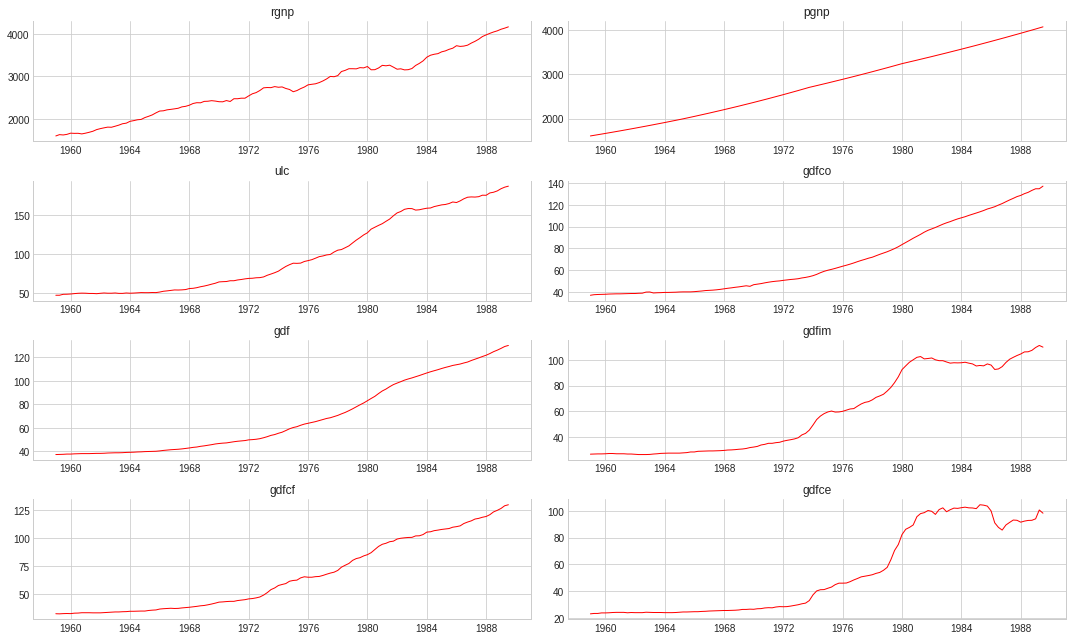

In [ ]:
# plot time series
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,9))

for i, ax in enumerate(axes.flatten()):

  data = df[df.columns[i]]
  ax.plot(data, color='red', linewidth=1)

  ax.set_title(df.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines["top"].set_alpha(0)
  ax.tick_params(labelsize=10)

plt.tight_layout();

Each of the series have a fairly similar trend patterns over the years except for `gdfce` and `gdfim`, where a different pattern is noticed starting in 1980.

### 2.2.) Train-Test Split

The VAR model will be fitted on df_train and then used to forecast the next 4 observations. These forecasts will be compared against the actuals present in test data.

To do the comparisons, we will use multiple forecast accuracy metrics.

In [ ]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(119, 8)
(4, 8)


In [ ]:
df_train

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8
...,...,...,...,...,...,...,...,...
1987-07-01,3872.8,3877.7,173.9,126.0,119.6,101.9,117.7,93.1
1987-10-01,3935.6,3901.0,175.8,127.6,120.8,103.3,118.7,92.9
1988-01-01,3974.8,3924.5,175.7,128.7,121.9,104.5,119.4,91.5


### 2.3.) Test for stationarity

Since the VAR model requires the time series you want to forecast to be stationary, it is customary to check all the time series in the system for stationarity.

Just to refresh, a stationary time series is one whose characteristics like mean and variance does not change over time.

So, how to test for stationarity?

There is a suite of tests called unit-root tests. The popular ones are:

- Augmented Dickey-Fuller Test (ADF Test)
- KPSS test
- Philip-Perron test

Let’s use the ADF test for our purpose.

By the way, if a series is found to be non-stationary, you can make it stationary by differencing the series once and repeat the test again until it becomes stationary.

Since, differencing reduces the length of the series by 1 and since all the time series has to be of the same length, you need to difference all the series in the system if you choose to difference at all.

First, we implement a nice function (`adfuller_test()`) that writes out the results of the ADF test for any given time series and implement this function on each series one-by-one.

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 

    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f' > Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

Call the `adfuller_test()` on each series.

In [ ]:
# ADF Test on each column
for name, column in df_train.iteritems():
  print(name)
  print(column)
  adfuller_test(column, name=column.name)
  print('\n')

rgnp
date
1959-01-01    1606.4
1959-04-01    1637.0
1959-07-01    1629.5
1959-10-01    1643.4
1960-01-01    1671.6
               ...  
1987-07-01    3872.8
1987-10-01    3935.6
1988-01-01    3974.8
1988-04-01    4010.7
1988-07-01    4042.7
Name: rgnp, Length: 119, dtype: float64
 > Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.5428
 No. Lags Chosen       = 2
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.9861. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


pgnp
date
1959-01-01    1608.3
1959-04-01    1622.2
1959-07-01    1636.2
1959-10-01    1650.3
1960-01-01    1664.6
               ...  
1987-07-01    3877.7
1987-10-01    3901.0
1988-01-01    3924.5
1988-04-01    3948.1
1988-07-01    3971.9
Name: pgnp, Length: 119, dtype: float64
 > Aug

The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.

### 2.4.) Transform via differencing for stationarity

In [ ]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [ ]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 > Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3448
 No. Lags Chosen       = 1
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 > Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8282
 No. Lags Chosen       = 0
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.3666. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 > Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

After the first difference, Real Wages (Manufacturing) is still not stationary. It’s critical value is between 5% and 10% significance level.

All of the series in the VAR model should have the same number of observations.

So, we are left with one of two choices.

That is, either proceed with 1st differenced series or difference all the series one more time.

In [ ]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [ ]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 > Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.0123
 No. Lags Chosen       = 2
 Critical value 1%     = -3.489
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 > Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.9813
 No. Lags Chosen       = 0
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 > Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test

### 2.5.) Test for statistical connections amongst time series

#### 2.5.1.) Granger Causality Test

ALSO SEE TODA-YAMAMOTO AUGMENTED GRANGER CAUSALITY TEST

The basis behind Vector AutoRegression is that each of the time series in the system influences each other. That is, you can predict the series with past values of itself along with other series in the system. Using Granger’s Causality Test, it’s possible to test this relationship before even building the model.

So what does Granger’s Causality really test?

- Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.

- In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.

The below code implements the Granger’s Causality test for all possible combinations of the time series in a given dataframe and stores the p-values of each combination in the output matrix.

In [ ]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [ ]:
maxlag=12
test = 'ssr_chi2test'
grangers_causation_matrix(df, variables = df.columns)

,rgnp_x,pgnp_x,ulc_x,gdfco_x,gdf_x,gdfim_x,gdfcf_x,gdfce_x
rgnp_y,1.0000,0.0003,0.0001,0.0212,0.0014,0.0620,0.0001,0.0071
pgnp_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ulc_y,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0041
gdfco_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
gdf_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
gdfim_y,0.0011,0.0067,0.0014,0.0083,0.0011,1.0000,0.0004,0.0000
gdfcf_y,0.0000,0.0000,0.0008,0.0008,0.0000,0.0038,1.0000,0.0009
gdfce_y,0.0025,0.0485,0.0000,0.0002,0.0000,0.0000,0.0000,1.0000


The row are the Response (Y) and the columns are the predictor series (X).

For example, if you take the value 0.0003 in (row 1, column 2), it refers to the p-value of `pgnp_x` causing `rgnp_y`. Whereas, the 0.000 in (row 2, column 1) refers to the p-value of rgnp_y causing `pgnp_x`.

So, how to interpret the p-values?

If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

For example, P-Value of 0.0003 at (row 1, column 2) represents the p-value of the Grangers Causality test for `pgnp_x` causing `rgnp_y`, which is less that the significance level of 0.05.

So, you can reject the null hypothesis and conclude `pgnp_x` causes `rgnp_y`.

Looking at the P-Values in the above table, you can pretty much observe that all the variables (time series) in the system are interchangeably causing each other.

This makes this system of multi time series a good candidate for using VAR models to forecast.

#### 2.5.1.) Cointegration of original time series

Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

But, what does Cointegration mean?

To understand that, you first need to know what is ‘order of integration’ (d).

Order of integration(d) is nothing but the number of differencing required to make a non-stationary time series stationary.

Now, when you have two or more time series, and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be cointegrated.

Ok?

When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.

This is the basic premise on which Vector Autoregression(VAR) models is based on. So, it’s fairly common to implement the cointegration test before starting to build VAR models.

Alright, So how to do this test?

Soren Johanssen in his paper (1991) devised a procedure to implement the cointegration test.

It is fairly straightforward to implement in python’s statsmodels, as you can see below.

In [ ]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [ ]:
cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
rgnp   ::  248.0     > 143.6691  =>   True
pgnp   ::  183.12    > 111.7797  =>   True
ulc    ::  130.01    > 83.9383   =>   True
gdfco  ::  85.28     > 60.0627   =>   True
gdf    ::  55.05     > 40.1749   =>   True
gdfim  ::  31.59     > 24.2761   =>   True
gdfcf  ::  14.06     > 12.3212   =>   True
gdfce  ::  0.45      > 4.1296    =>   False


### 2.6.) Find optimal order (p)

To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.

Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

In [ ]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]: # could go much higher too
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -1.3679402315450664
BIC :  0.3411847146588838
FPE :  0.2552682517347198
HQIC:  -0.6741331335699554 

Lag Order = 2
AIC :  -1.621237394447823
BIC :  1.6249432095295857
FPE :  0.2011349437137141
HQIC:  -0.3036288826795914 

Lag Order = 3
AIC :  -1.7658008387012782
BIC :  3.034547316376784
FPE :  0.18125103746164378
HQIC:  0.18239143783963385 

Lag Order = 4
AIC :  -2.000735164470316
BIC :  4.371215137654089
FPE :  0.15556966521481125
HQIC:  0.5849359332771087 

Lag Order = 5
AIC :  -1.9619535608363972
BIC :  5.999364562242094
FPE :  0.18692794389114853
HQIC:  1.2682063311783311 

Lag Order = 6
AIC :  -2.3303386524829035
BIC :  7.238452689088582
FPE :  0.16380374017443694
HQIC:  1.551437166954809 

Lag Order = 7
AIC :  -2.592331352347129
BIC :  8.602387254937796
FPE :  0.1823868583715414
HQIC:  1.9483069621146551 

Lag Order = 8
AIC :  -3.317261976458205
BIC :  9.52219581032303
FPE :  0.15573163248209088
HQIC:  1.8896071386220985 

Lag Order = 9
AIC :  -4.804763125958

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In the above output, the AIC drops to lowest at lag 4, then increases at lag 5 and then continuously drops further. Let’s go with the lag 4 model.

An alternate method to choose the order(p) of the VAR models is to use the `model.select_order(maxlags)` method.

The selected order(p) is the order that gives the lowest ‘AIC’, ‘BIC’, ‘FPE’ and ‘HQIC’ scores.

In [ ]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-0.07898,0.1232,0.9241,0.002961
1,-0.5721,1.248,0.5662,0.1653
2,-0.8256,2.612,0.4482,0.5674
3,-1.007,4.048,0.3937,1.042
4,-1.255,5.418,0.3399,1.449
5,-1.230,7.060,0.4147,2.129
6,-1.739,8.169,0.3286,2.276
7,-2.142,9.384,0.3340,2.528
8,-2.964,10.18,0.2744,2.362
9,-4.562,10.20,0.1413,1.420


According to FPE and HQIC, the optimal lag is observed at a lag order of 3.

I, however, don’t have an explanation for why the observed AIC and BIC values differ when using `result.aic` versus as seen using `model.select_order()`.

Since the explicitly computed AIC is the lowest at lag 4, I choose the selected order as 4.

### 2.7.) Train the VAR Model of Selected Order (p)

In [ ]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, Aug, 2021
Time:                     14:10:41
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    4.37122
Nobs:                     113.000    HQIC:                  0.584936
Log likelihood:          -905.679    FPE:                   0.155570
AIC:                     -2.00074    Det(Omega_mle):       0.0200322
--------------------------------------------------------------------
Results for equation rgnp
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            2.430021         2.677505            0.908           0.364
L1.rgnp         -0.750066         0.159023           -4.717           0.000
L1.pgnp         -0.095621         4.938865           -0.019           0.985
L1.ul

#### 2.7.1) Check for Serial Correlation of Residuals (Errors) using Durbin-Watson Statistic

Serial correlation of residuals is used to check if there is any leftover pattern in the residuals (errors).

What does this mean to us? If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either:

- increase the order of the model or induce more predictors into the system, or
- look for a different algorithm to model the time series.

So, checking for serial correlation is to ensure that the model is sufficiently able to explain the variances and patterns in the time series. A common way of checking for serial correlation of errors can be measured using the Durbin Watson’s Statistic.

The value of this statistic can vary between 0 and 4. 

- The closer it is to the value 2, then there is no significant serial correlation. 
- The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.




In [ ]:
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    def adjust(val, length= 6): return str(val).ljust(length)
    print(adjust(col), ':', round(val, 2))

rgnp   : 2.09
pgnp   : 2.02
ulc    : 2.17
gdfco  : 2.05
gdf    : 2.25
gdfim  : 1.99
gdfcf  : 2.2
gdfce  : 2.17


The serial correlation seems quite alright. Let’s proceed with the forecast.

### 2.8.) Make VAR Forecast with statsmodels

In order to forecast, the VAR model expects up to the lag order number of observations from the past data. This is because, the terms in the VAR model are essentially the lags of the various time series in the dataset, so you need to provide it as many of the previous values as indicated by the lag order used by the model.

In [ ]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[ 13.5,   0.1,   1.4,   0.1,   0.1,  -0.1,   0.4,  -2. ],
       [-23.6,   0.2,  -2. ,  -0.5,  -0.1,  -0.2,  -0.3,  -1.2],
       [ -3.3,   0.1,   3.1,   0.5,   0.3,   0.4,   0.9,   2.2],
       [ -3.9,   0.2,  -2.1,  -0.4,   0.2,  -1.5,   0.9,  -0.3]])

In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,rgnp_2d,pgnp_2d,ulc_2d,gdfco_2d,gdf_2d,gdfim_2d,gdfcf_2d,gdfce_2d
date,,,,,,,,
1988-10-01,48.322456,1.250774,0.595993,0.265657,-0.104146,0.304119,-0.917227,-0.113061
1989-01-01,-34.962286,-0.387966,-0.329877,-0.042217,0.164633,1.357223,0.618163,3.029975
1989-04-01,20.392680,0.291298,0.390812,-0.134488,-0.486073,-0.149551,-1.238234,-2.345223
1989-07-01,-37.416599,-0.280943,0.367912,0.102797,0.333371,-0.502103,0.469468,0.517424


The forecasts are generated but it is on the scale of the training data used by the model. So, to bring it back up to its original scale, you need to de-difference it as many times you had differenced the original input data.

In this case it is two times.

### 2.9.) Invert transformations to get real forecasts

In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
                   'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

,rgnp_forecast,pgnp_forecast,ulc_forecast,gdfco_forecast,gdf_forecast,gdfim_forecast,gdfcf_forecast,gdfce_forecast
date,,,,,,,,
1988-10-01,4123.022456,3996.950774,181.095993,132.965657,126.395854,106.604119,125.082773,93.186939
1989-01-01,4168.382626,4021.613582,182.262108,134.389097,128.056341,108.365461,127.283708,96.603854
1989-04-01,4234.135476,4046.567687,183.819036,135.678050,129.230756,109.977252,128.246409,97.675545
1989-07-01,4262.471728,4071.240850,185.743875,137.069799,130.738542,111.086940,129.678579,99.264661


### 2.10.) Evaluate the model

#### 2.10.1) Plot forecast vs actual values

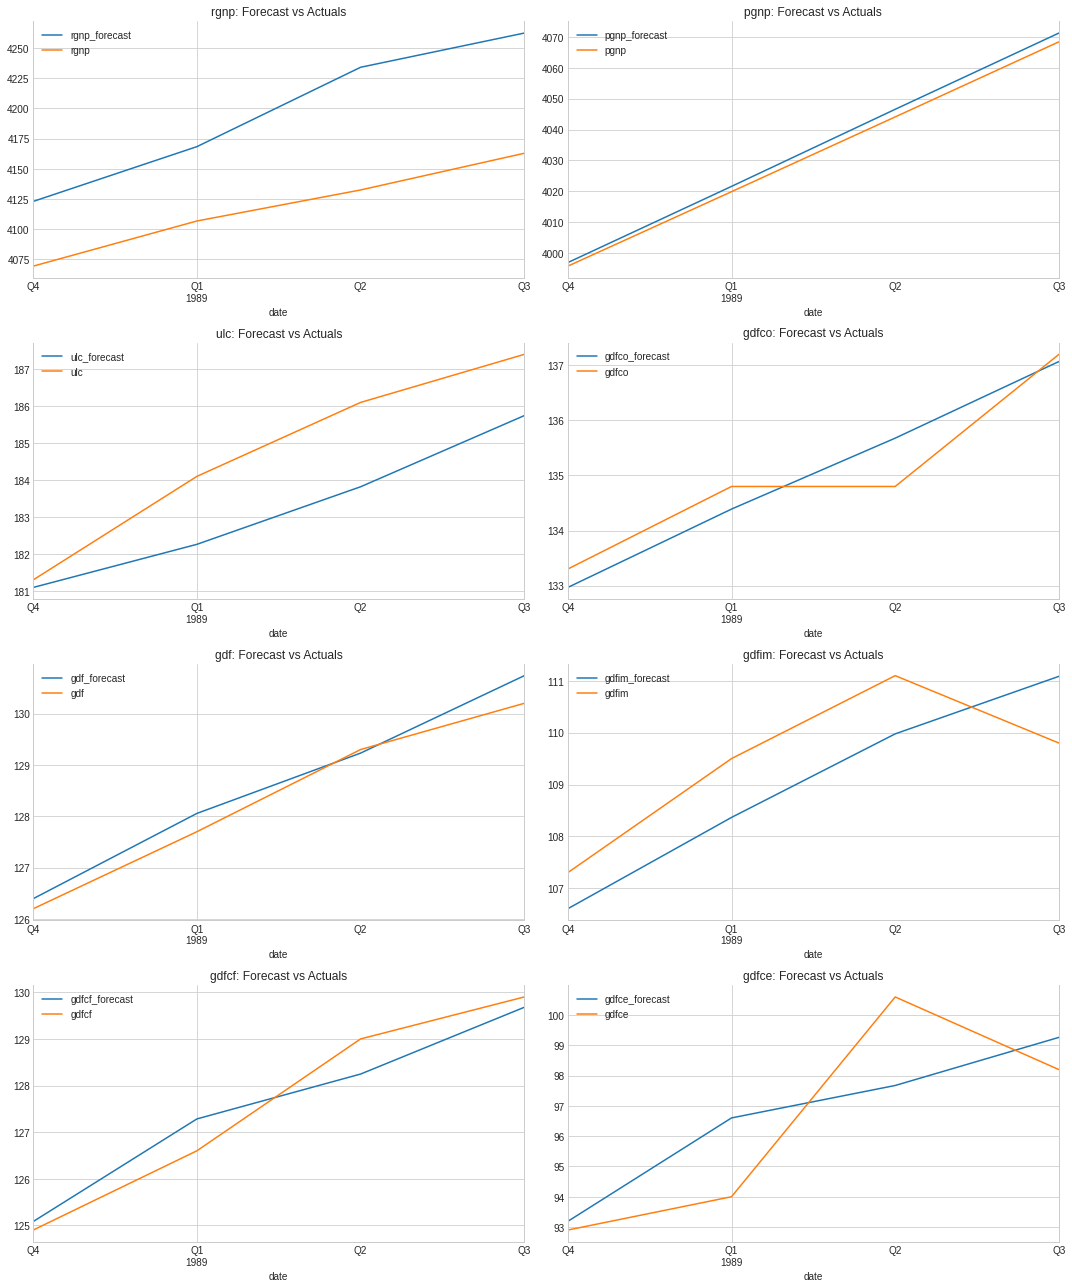

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, figsize=(15,18))

for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):

    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);

    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=10)

plt.tight_layout();

#### 2.10.2.) Evaluate the forecasts

To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [ ]:
print('Forecast Accuracy of: rgnp')
accuracy_prod = forecast_accuracy(df_results['rgnp_forecast'].values, df_test['rgnp'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: pgnp')
accuracy_prod = forecast_accuracy(df_results['pgnp_forecast'].values, df_test['pgnp'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: ulc')
accuracy_prod = forecast_accuracy(df_results['ulc_forecast'].values, df_test['ulc'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfco')
accuracy_prod = forecast_accuracy(df_results['gdfco_forecast'].values, df_test['gdfco'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdf')
accuracy_prod = forecast_accuracy(df_results['gdf_forecast'].values, df_test['gdf'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfim')
accuracy_prod = forecast_accuracy(df_results['gdfim_forecast'].values, df_test['gdfim'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfcf')
accuracy_prod = forecast_accuracy(df_results['gdfcf_forecast'].values, df_test['gdfcf'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfce')
accuracy_prod = forecast_accuracy(df_results['gdfce_forecast'].values, df_test['gdfce'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: rgnp
mape   :  0.0192
me     :  79.1031
mae    :  79.1031
mpe    :  0.0192
rmse   :  82.0245
corr   :  0.9849
minmax :  0.0188

Forecast Accuracy of: pgnp
mape   :  0.0005
me     :  2.0432
mae    :  2.0432
mpe    :  0.0005
rmse   :  2.146
corr   :  1.0
minmax :  0.0005

Forecast Accuracy of: ulc
mape   :  0.0081
me     :  -1.4947
mae    :  1.4947
mpe    :  -0.0081
rmse   :  1.6856
corr   :  0.963
minmax :  0.0081

Forecast Accuracy of: gdfco
mape   :  0.0033
me     :  0.0007
mae    :  0.4384
mpe    :  0.0
rmse   :  0.5169
corr   :  0.9407
minmax :  0.0032

Forecast Accuracy of: gdf
mape   :  0.0023
me     :  0.2554
mae    :  0.29
mpe    :  0.002
rmse   :  0.3392
corr   :  0.9905
minmax :  0.0022

Forecast Accuracy of: gdfim
mape   :  0.0097
me     :  -0.4166
mae    :  1.06
mpe    :  -0.0038
rmse   :  1.0826
corr   :  0.807
minmax :  0.0096

Forecast Accuracy of: gdfcf
mape   :  0.0036
me     :  -0.0271
mae    :  0.4604
mpe    :  -0.0002
rmse   :  0.5286
corr   :  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
